In this notebook we want to learn what positional encoding is.  
We will also try to implement a simple example of positional encoding algorithm.

### Why PE is important

First of all it's important to remember that in the embedding layer isn't encoded information about the position of the token (word, patch) in the input (sentence, image)  
To overcome this problem, the token position information is encoded in a subsequent step: positional encoding.

<span style="color:red">

1. Inserire qualcosa sul perchè il PE serve nei transformers e non nelle LSTM
2. Ricordati poi di portare il discorso in generale
3. Why sinusoidal functions?



</span>

### Additive PE

The authors of \cite{Att_is_all_u_need} propose an additive positional encoding, i.e. another vector is added to the embedded one, whose entries are a combination of goniometric functions of variable frequency:
\begin{equation}
\begin{aligned}
&PE_{(pos, 2i)} = \sin\left(\frac{pos}{10000^{2i/d_{\text{model}}}}\right) \\
&PE_{(pos, 2i+1)}= \cos\left(\frac{pos}{10000^{2i/d_{\text{model}}}}\right)
\end{aligned}
\end{equation}
where:  
$\textit{pos}$ is the position of the token,  
$\textit{i}$ is the index of the entries of the embedding vector  
$d_\text{model}$ is the total dimension of the embedding.

Let's suppose to have an input of length L, for example the sentence: *Attention is all you need*  
First we want to define the positional vector (that is the vector wich is added to the embedding one in order to obtain the PE).  
For semplicity let's assume that each word rapresents a token:  
1. eache token is assciated to his position in the input
$$ 
\begin{array}{|c|c|}
\hline
\textbf{Word} & \textbf{Position (pos)} \\
\hline
\text{Attention} & 0 \\
\text{is} & 1 \\
\text{all} & 2 \\
\text{you} & 3 \\
\text{need} & 4 \\
\hline
\end{array}$$

2. let's fix  $d_\text{model}$ = 7 that is the dimension of the embedding vector

3. Our target is to define for each token the positional vector that has dimensions: (1, $d_\text{model}$). So at the end we would like to have a matrix of dimensions: ($input_dim$, $d_{model}$).
Fixed the k-th token, since the vector (PV) has odd and even entrances, we can proceed in this way:

- if the entrance is even we define $ PV_j = sin(\frac{k}{n^{j/d_{model}}})$


- if the entrance is odd we define $ PV_j = cos(\frac{k}{n^{j-1/d_{model}}})$


where  n is a user defined scalar (authors used 10 000)

We can express the two preveous formulas in a compact way (see \ref{})

For example, the positional vector for the word *Attention* will be:  
$$
[sin(\frac{0}{n^{0/7}}), cos(\frac{0}{n^{0/7}}), \dots, cos(\frac{0}{n^{6/7}}) ]
$$

that is

$$
[0, 1, \dots, 1]
$$


| **Sequence** | **Index k** | **Pₖ₀ = sin(k / 1)** | **Pₖ₁ = cos(k / 1)** | **Pₖ₂ = sin(k / 10^(1/6))** | **Pₖ₃ = cos(k / 10^(1/6))** |
| ------------ | ----------- | -------------------- | -------------------- | --------------------------- | --------------------------- |
| Attention    | 0           | sin(0) = **0.00**    | cos(0) = **1.00**    | sin(0.00) = **0.00**        | cos(0.00) = **1.00**        |
| is           | 1           | sin(1) = **0.84**    | cos(1) = **0.54**    | sin(0.68) = **0.63**        | cos(0.68) = **0.78**        |
| all          | 2           | sin(2) = **0.91**    | cos(2) = **-0.42**   | sin(1.36) = **0.98**        | cos(1.36) = **0.21**        |
| you          | 3           | sin(3) = **0.14**    | cos(3) = **-0.99**   | sin(2.04) = **0.89**        | cos(2.04) = **-0.46**       |
| need         | 4           | sin(4) = **-0.76**   | cos(4) = **-0.65**   | sin(2.72) = **0.40**        | cos(2.72) = **-0.92**       |


In [31]:
x = [0,1,2,3,4]
np.cos(x)

array([ 1.        ,  0.54030231, -0.41614684, -0.9899925 , -0.65364362])

In [45]:
# Example
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(17)

# la matrice di input ha dimensione (seq_len, d_model): ogni riga è un token
x = np.random.randn(5,7)
# quindi ad esempio, l'embedding di 'all' è
x_2 = x[2,:]
d = 6 # d must be even


The following block builds the positional matrix that must be added to the input one

In [12]:
import numpy as np
d = 6
def getPositionEncoding(seq_len, d, n=10):
    P = np.zeros((seq_len, d))
    for k in range(seq_len):
        for i in np.arange(int(d/2)):
            denominator = np.power(n, 2*i/d)
            P[k, 2*i] = np.sin(k/denominator)
            P[k, 2*i+1] = np.cos(k/denominator)
    return P
 
P = getPositionEncoding(seq_len=5, d=6, n=10)
print(P)

[[ 0.          1.          0.          1.          0.          1.        ]
 [ 0.84147098  0.54030231  0.44767083  0.89419843  0.21378067  0.97688169]
 [ 0.90929743 -0.41614684  0.80061311  0.59918165  0.41767683  0.90859565]
 [ 0.14112001 -0.9899925   0.98414313  0.17737615  0.60226103  0.79829922]
 [-0.7568025  -0.65364362  0.95942537 -0.28196271  0.75899871  0.65109212]]


Il blocco seguente invece mostra 4 funzioni sinusoidali al variare del parametro 'k' che rappresenta la posizione del token nell'input.  
Ciò che si osserva è che a ogni token è associata una funzione goniometrica diversa.

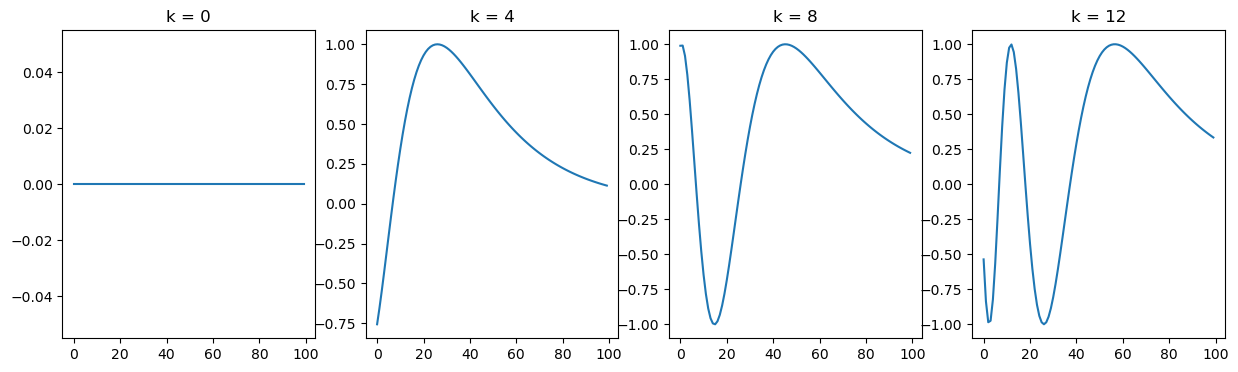

In [50]:
def plotSinusoid(k, d=512, n=10000):
    x = np.arange(0, 100, 1)
    denominator = np.power(n, 2*x/d)
    y = np.sin(k/denominator)
    plt.plot(x, y)
    plt.title('k = ' + str(k))
 
fig = plt.figure(figsize=(15, 4))    
for i in range(4):
    plt.subplot(141 + i)
    plotSinusoid(i*4)

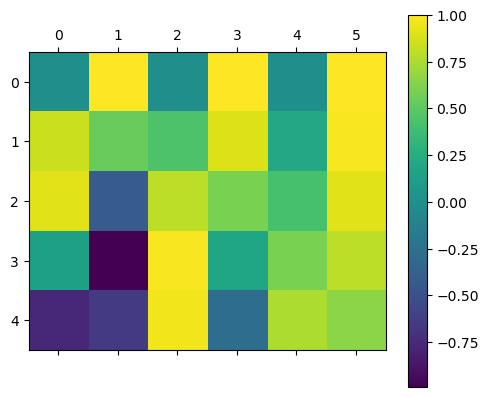

In [11]:
import matplotlib.pyplot as plt
P = getPositionEncoding(seq_len=5, d=6, n=10)
cax = plt.matshow(P)
plt.gcf().colorbar(cax)
plt.savefig("positional_encoding.png", dpi=300, bbox_inches='tight')

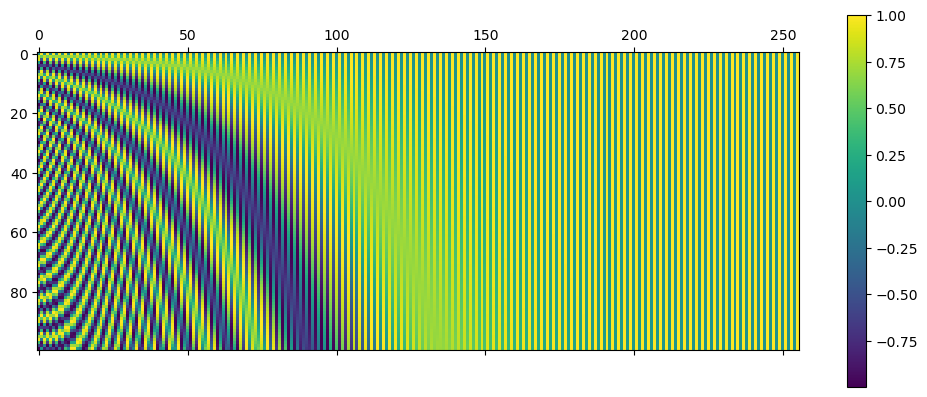

In [9]:
P = getPositionEncoding(seq_len=100, d=256, n=10000)
cax = plt.matshow(P)
plt.gcf().colorbar(cax)
plt.savefig("positional_encoding_general.png", dpi=300, bbox_inches='tight')


For example, if a sentence or an image is tokenized in $n$ tokens each of dimension $d$, the output of the embedding layer is a $(n,d)$-dimensional matrix (actually is a $(B,n,d)$-dim tensor, where \textit{B} is the batch dimension), in the positional encoding step we add another matrix with same dimensions. Its entries are the sine (for even position) or cosine (for odd ones) of $\theta_{i,j}$.\\
Where the angle is $\theta_{i,j}$ obtained by:
\begin{equation}
    \theta_{i,j} = \dfrac{i}{10000^{2j/d}}
\end{equation}
\textcolor{red}{AGGIUNGERE ESEMPIO SPEIGATO BENE}
Possiamo visualizzare quello che succede in un caso in cui le dimensioni sono molto ridotte.
Supponiamo che l'input sia la frase seguente: "I am writing a thesis", senza perdita di generalità, possiamo supporre che ogni parola costituisca un token, come prima cosa assegnamo a ogni token un indice https://machinelearningmastery.com/a-gentle-introduction-to-positional-encoding-in-transformer-models-part-1/







### Not additive PE

### MEMO
L = input length

In [3]:
dir(np)

['False_',
 'ScalarType',
 'True_',
 '_CopyMode',
 '_NoValue',
 '__NUMPY_SETUP__',
 '__all__',
 '__array_api_version__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__dir__',
 '__doc__',
 '__expired_attributes__',
 '__file__',
 '__former_attrs__',
 '__future_scalars__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__numpy_submodules__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_core',
 '_distributor_init',
 '_expired_attrs_2_0',
 '_get_promotion_state',
 '_globals',
 '_int_extended_msg',
 '_mat',
 '_msg',
 '_no_nep50_warning',
 '_pyinstaller_hooks_dir',
 '_pytesttester',
 '_set_promotion_state',
 '_specific_msg',
 '_type_info',
 '_typing',
 '_utils',
 'abs',
 'absolute',
 'acos',
 'acosh',
 'add',
 'all',
 'allclose',
 'amax',
 'amin',
 'angle',
 'any',
 'append',
 'apply_along_axis',
 'apply_over_axes',
 'arange',
 'arccos',
 'arccosh',
 'arcsin',
 'arcsinh',
 'arctan',
 'arctan2',
 'arctanh',
 'argmax',
 'argmin',
 'argpartition',
 'argsort',
 'argwhere',
 'a